# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


Your final notebook must:


Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.

In [59]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#Only Set to 15
lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-180.000, high=180.000, size=150)
#Only Set to 15
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

109

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities
#Plots are listed in Imperial
units = "imperial"
#Manual API option
#api_key = "575be4a8306d0d32bee4173eadc6482c"

In [62]:
# Test for city of London to see if URL and API work
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url_test = f"{base_url}appid={api_key}&units={units}&q=london"
response=requests.get(query_url_test).json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'},
  {'id': 310,
   'main': 'Drizzle',
   'description': 'light intensity drizzle rain',
   'icon': '09d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 64.09,
  'pressure': 1009,
  'humidity': 88,
  'temp_min': 62.01,
  'temp_max': 66.2},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 210},
 'clouds': {'all': 90},
 'dt': 1563565875,
 'sys': {'type': 1,
  'id': 1414,
  'message': 0.0111,
  'country': 'GB',
  'sunrise': 1563509115,
  'sunset': 1563566876},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [63]:
#Date format not operable
#https://avilpage.com/2014/11/python-unix-timestamp-utc-and-their.html
datetime.datetime.utcfromtimestamp(response["dt"])
datetime.datetime(2019, 7, 20, 16, 0, 0)

datetime.datetime(2019, 7, 20, 16, 0)

In [64]:
# Create empty lists to append the API data into lists 
city_name = []
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 0
set= 1
count= 0

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    
    #used to count to 50 and reset
    if count == 50:
        #sets a sleep period for api
       time.sleep(1)
       count = 0
       record = 0
       set+=1
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{base_url}appid={api_key}&units={units}&q={city}").json()
        city_name.append(response["name"])
        city_id.append(response["id"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        #city_record = response["name"]
        
        # Increase counter by one 
        count += 1
        record += 1
        
        #Print log of each city as it's being processed with the city number and city name.
        #print(f"Processing Record {record} of Set {set} | {city_id} {city}")
        print(f"Processing Record {record} of Set {set} | {city}")
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
# Log file print statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | antalaha
Processing Record 5 of Set 1 | juneau
Processing Record 6 of Set 1 | phan thiet
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | tual
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | logumkloster
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | port blair
Processing Record 18 of Set 1 | vetluzhskiy
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | popondetta
City not found. Skipping...
Processing Record 22 of Set 1 | kapaa
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    #Unsure if a City ID needs to be displayed, requested in instructions but the example does not show a ID
    #"City ID": city_id,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          97
Cloudiness    97
Country       97
Date          97
Humidity      97
Lat           97
Lng           97
Max Temp      97
Wind Speed    97
dtype: int64

In [66]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,100,NZ,1563566361,97,-46.19,168.86,45.00,3.00
1,Kruisfontein,76,ZA,1563566362,70,-34.00,24.73,48.91,27.69
2,Hilo,75,US,1563566193,69,19.71,-155.08,82.00,16.96
3,Antalaha,13,MG,1563566362,98,-14.90,50.28,61.69,4.47
4,Juneau,90,US,1563566116,93,58.30,-134.42,59.00,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

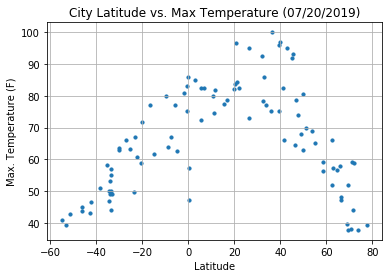

In [67]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (07/20/2019)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

This graph is the most definitive to display the differences between those cities furthest away from the equator. 23 1/2 Degrees Noth and South of the equator are considered the tropics and the temperature drops significantly. ALso noted the Northern Hemisphere is in the Summer season while the Southern Hemisphere is winter.

#### Latitude vs. Humidity Plot

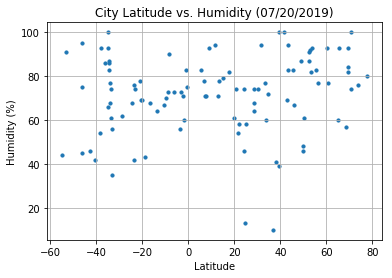

In [38]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/20/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

Cities closer to the equator have the most hunidty and often drop off further away. Note that many cities in the South America equatorial belt are on the Andes Mountians and Eastern African cities are built at high elevations and this likely skews results.

#### Latitude vs. Cloudiness Plot

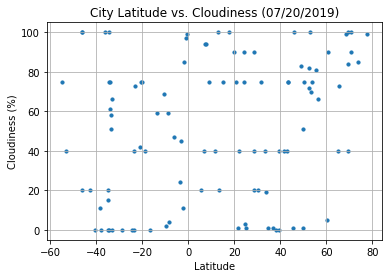

In [39]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (07/20/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

Cities near the equator have more clouds than furth away from the equator. However its hard to generalize this graph as the data is fairly consistent across latitudes.

#### Latitude vs. Wind Speed Plot

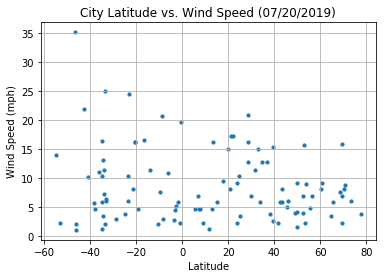

In [40]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (07/20/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

Overall the vast majority of Cities in any latitude have wind speeds below 10 miles per hour. Outliers with high wind speeds above 20 MPH occur more frequntly further from the equator.